In [7]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [8]:
csv_path = './1_performance/bwutil.csv'
workload_list = ['505', '519', '549', '557']
scheme_list = ['SILC-FM', 'Baryon (Low Assoc)', 'Hybrid2', 'Baryon (High Assoc)']
workload_dict = {item: item for item in workload_list}
scheme_dict = {item: item for item in scheme_list}

fig_title = 'Fast Memory &\nSlow Memory Utilization'
fig_name = 'graph_bwutil'
fig_ylim = (0, 1)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1]+0.01, 0.2))
hitrate_ylim = (0, 1)
hitrate_yticks = list(np.arange(hitrate_ylim[0], hitrate_ylim[1]+0.01, 0.2))
hybrid2_color = '#fb9a99'
fig_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [5, 3]] + [hybrid2_color] + [easypyplot.color.COLOR_SET[0]]
assert len(fig_bar_colors) == len(scheme_dict)

# pprint(fig_yticks)

In [9]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (5, 2)
fig_label_fontsize = 9
ft = fm.FontProperties('Times New Roman')
ft.set_size(9.0)

In [10]:
''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
fig_xlabels = []
fig_xticks = []
fig_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        fig_data_2darr.append(row_value)
        fig_xlabels.append(workload_fullname)
        xtick += 1
        fig_xticks.append(xtick)
assert len(fig_data_2darr) == len(fig_xlabels) == len(fig_xticks)


csv_path = './1_performance/hitrate.csv'
csv_hd = pd.read_csv(csv_path, sep=',')
hitrate_xlabels = []
hitrate_xticks = []
hitrate_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        hitrate_data_2darr.append(row_value)
        hitrate_xlabels.append(workload_fullname)
        xtick += 1
        hitrate_xticks.append(xtick)
hitrate_data_2darr = np.transpose(hitrate_data_2darr)
assert len(hitrate_data_2darr) == len(hitrate_xlabels) == len(hitrate_xticks)

pprint(fig_data_2darr)
print(hitrate_data_2darr)

[[0.33, 0.13, 0.14, 0.24],
 [0.03, 0.41, 0.76, 0.94],
 [0.02, 0.28, 0.57, 0.7],
 [0.31, 0.15, 0.74, 0.92]]
[[0.56 0.11 0.1  0.56]
 [0.62 0.78 0.82 0.4 ]
 [0.68 0.89 0.78 0.86]
 [0.79 0.9  0.92 0.89]]


9.0


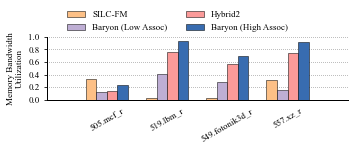

In [11]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

h = easypyplot.barchart.draw(
    ax, fig_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=fig_xlabels,
    xticks=fig_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=30,
    prop=ft,
    colors=fig_bar_colors)

''' x axis '''
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.set_xticks(fig_xticks)
ax.set_xticklabels(fig_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# ax.tick_params(direction='in') # [in, out, inout]
# ax.set_xlabel(fig_title)

''' y axis '''
ax.yaxis.grid(True)
ax.set_ylim(fig_ylim)
ax.set_yticks(fig_yticks)
ax.set_ylabel('Memory Bandwidth\nUtilization', multialignment='center', fontproperties=ft)

''' values on top of each bar '''
# for group_id in range(len(workload_dict)):
#     for entry_id in range(len(scheme_dict)):
#         bar_value = fig_data_2darr[group_id][entry_id]
#         bar_x = ax.get_xticks()[group_id] + fig_bar_width / len(scheme_dict) * (entry_id - len(scheme_dict) / 2)
#         bar_text = str('{:.2f}'.format(bar_value))
#         ax.text(bar_x, bar_value + 0.1, bar_text, ha='left', va='top',
#                 fontsize=fig_label_fontsize,
#                 # rotation=90,
#                 fontproperties=ft,
#                 )

''' legend '''
legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(h, legend, loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=len(legend) // 2, frameon=False, prop=ft)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.8)

In [12]:
''' Save figures'''
fig.savefig(fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures